# Description

In this notebook, I will explore the built model translation from English to VietNamese

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try: tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:   print(e)

import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import regex as re
import string

import tensorflow_text as tf_text

import sys
sys.path.append('..')
from utils.read_file_utils import *
from utils.model_utils import *
from utils.visualize_util import *

/home/necphy/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
PATH_MODEL_TRANSLATOR = "../translator"
PATH_TOKENIZER = r"../data/tokeninzer_en_vi_converter"

# 1. Load model

In [3]:
translator = tf.saved_model.load(PATH_MODEL_TRANSLATOR)
tokenizers = tf.saved_model.load(PATH_TOKENIZER)

In [10]:
sentence = 'The capital of Vietnam is Hanoi, which is bordered by the Red and Black Rivers.'
# sentence = "break the ice"
sentence = sentence.lower()

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))
translated_text = translated_text.numpy().decode('utf-8')
print(translated_text)

thủ đô việt nam là hà nội , giáp với các con sông đỏ và đen .


We can visualize the attention map

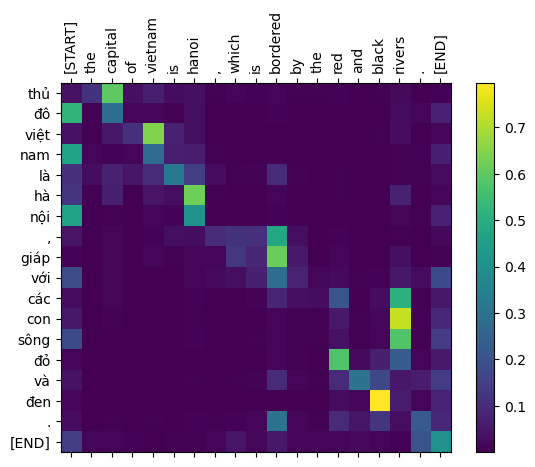

: 

In [ ]:
# Extract input sentence into tokens
in_tokens = tf.convert_to_tensor([sentence])
in_tokens = tokenizers.en.tokenize(in_tokens).to_tensor()
in_tokens = tokenizers.en.lookup(in_tokens)[0]

# Get average attention map
average_attention_weights = attention_weights[0].numpy()
average_attention_weights = average_attention_weights.mean(axis=0)

plot_attention_head(in_tokens, translated_tokens, average_attention_weights)